## **HSV Color Space for Object Detection and Object Tracking**

Hue, Saturation, Value  (HSV)

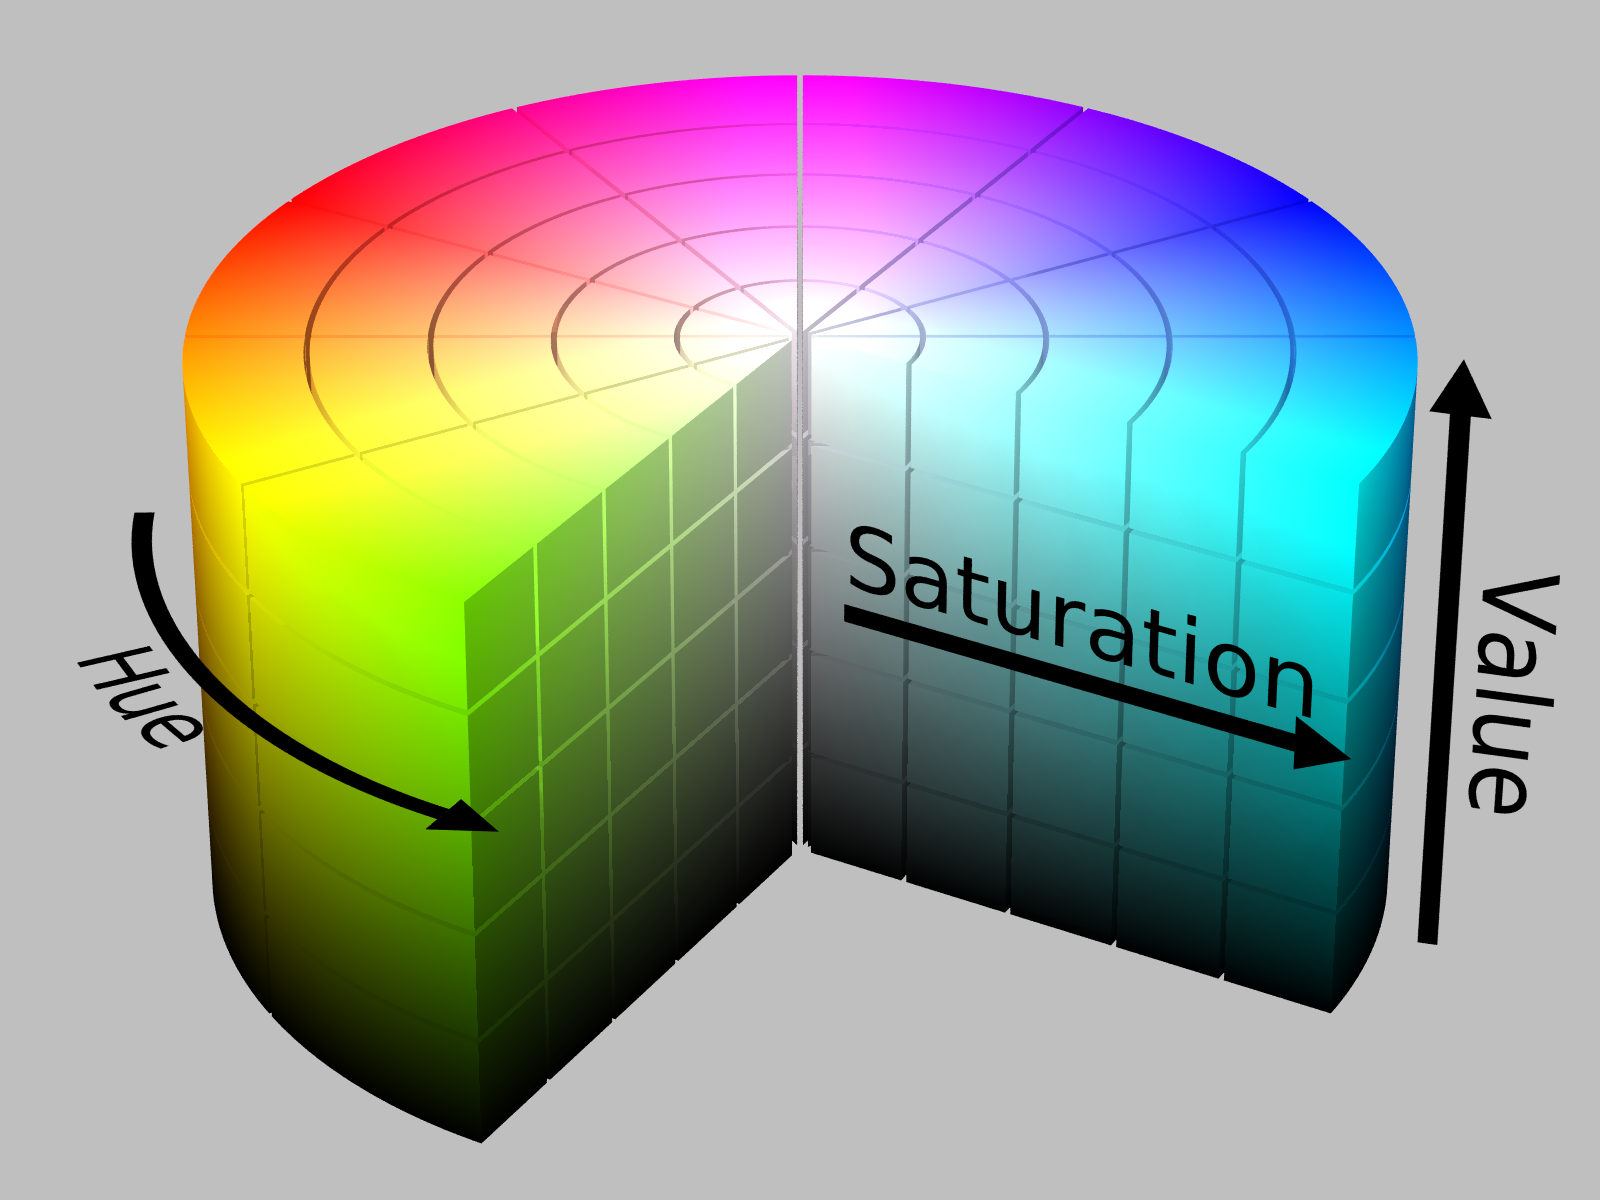

### **HSV Color Picker**

- https://pysource.com/2021/10/19/simple-color-recognition-with-opencv-and-python


In [1]:
import cv2
import numpy as np


# Trackbar
cv2.namedWindow("HSV Color Picker")
cv2.createTrackbar("H", "HSV Color Picker", 0, 179, lambda _: None)
cv2.createTrackbar("S", "HSV Color Picker", 255, 255, lambda _: None)
cv2.createTrackbar("V", "HSV Color Picker", 255, 255, lambda _: None)

img_hsv = np.zeros((250, 500, 3), np.uint8)

while True:
    # Check if the window is still open
    if not cv2.getWindowProperty("HSV Color Picker", cv2.WND_PROP_VISIBLE):
        break

    h = cv2.getTrackbarPos("H", "HSV Color Picker")
    s = cv2.getTrackbarPos("S", "HSV Color Picker")
    v = cv2.getTrackbarPos("V", "HSV Color Picker")

    img_hsv[:] = (h, s, v)
    img_bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2BGR)
    cv2.imshow("HSV Color Picker", img_bgr)

    if cv2.waitKey(1) == ord("q"):
        cv2.destroyAllWindows()
        break

### **HSV With Image**

In [ ]:
import cv2
import numpy as np

img = cv2.imread("../Data/Images/smarties.png")

cv2.namedWindow("Tracking")
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.createTrackbar("LH", "Tracking", 0, 179, lambda _: None)
cv2.createTrackbar("UH", "Tracking", 179, 179, lambda _: None)
cv2.createTrackbar("LS", "Tracking", 50, 255, lambda _: None)
cv2.createTrackbar("US", "Tracking", 255, 255, lambda _: None)
cv2.createTrackbar("LV", "Tracking", 50, 255, lambda _: None)
cv2.createTrackbar("UV", "Tracking", 255, 255, lambda _: None)

cv2.imshow("Tracking", img)

while True:
    # Check if the window is still open
    if not cv2.getWindowProperty("Tracking", cv2.WND_PROP_VISIBLE):
        break

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    u_h = cv2.getTrackbarPos("UH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)

    result = cv2.bitwise_and(img, img, mask=mask)

    cv2.imshow("Mask", mask)
    cv2.imshow("Result", result)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        print("Lower Bound HSV:", lower_bound)
        print("Upper Bound HSV:", upper_bound)
        # cv2.imwrite("../Data/Images/Smarties_Result.png", result)
        break

cv2.destroyAllWindows()

### **HSV With Video**

In [8]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
cv2.namedWindow("Tracking")


cv2.createTrackbar("LH", "Tracking", 0, 179, lambda _: None)
cv2.createTrackbar("UH", "Tracking", 179, 179, lambda _: None)
cv2.createTrackbar("LS", "Tracking", 50, 255, lambda _: None)
cv2.createTrackbar("US", "Tracking", 255, 255, lambda _: None)
cv2.createTrackbar("LV", "Tracking", 50, 255, lambda _: None)
cv2.createTrackbar("UV", "Tracking", 255, 255, lambda _: None)

while True:
    ret, frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    l_h = cv2.getTrackbarPos("LH", "Tracking")
    u_h = cv2.getTrackbarPos("UH", "Tracking")
    l_s = cv2.getTrackbarPos("LS", "Tracking")
    u_s = cv2.getTrackbarPos("US", "Tracking")
    l_v = cv2.getTrackbarPos("LV", "Tracking")
    u_v = cv2.getTrackbarPos("UV", "Tracking")

    lower_bound = np.array([l_h, l_s, l_v])
    upper_bound = np.array([u_h, u_s, u_v])
    mask = cv2.inRange(hsv_frame, lower_bound, upper_bound)

    result = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow("Tracking", frame)
    cv2.imshow("Result", result)
    # cv2.imshow("Mask", mask)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        print("Lower Bound HSV:", lower_bound)
        print("Upper Bound HSV:", upper_bound)
        break

cap.release()
cv2.destroyAllWindows()

Lower Bound HSV: [80 50 50]
Upper Bound HSV: [179 255 255]


### **HSV Color Recognition**

In [22]:
import cv2
import numpy as np


def get_center(w, h):
    return (w // 2), (h // 2)


def get_color_name(hue_value):
    color = ""
    if hue_value < 5:
        color = "RED"
    elif hue_value < 22:
        color = "ORANGE"
    elif hue_value < 33:
        color = "YELLOW"
    elif hue_value < 78:
        color = "GREEN"
    elif hue_value < 131:
        color = "BLUE"
    elif hue_value < 170:
        color = "VIOLET"
    else:
        color = "RED"

    return color


cap = cv2.VideoCapture(0)
_, frame = cap.read()
cx, cy = get_center(frame.shape[1], frame.shape[0])
print(f"(CX:{cx} , CY:{cy})")


while True:
    ret, frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Pick pixel value
    pixel_center = hsv_frame[cy, cx]
    hue_value = pixel_center[0]

    color = get_color_name(hue_value)
    cv2.circle(frame, (cx, cy), 5, (25, 25, 25), 3)

    pixel_center_bgr = frame[cy, cx]
    b, g, r = (
        int(pixel_center_bgr[0]),
        int(pixel_center_bgr[1]),
        int(pixel_center_bgr[2]),
    )

    cv2.rectangle(frame, (cx - 85, 10), (cx + 85, 50), (255, 255, 255), -1)
    cv2.putText(frame, color, (cx - 80, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (b, g, r), 3)

    cv2.imshow("Video", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

(CX:320 , CY:240)
